# Demanda da Santa Gulodice

A indústria de bolos confeitados SANTA GULODICE tem sua produção baseada em uma política de capacidade constante de fabricação, ou seja, escolhe produzir durante todo o ano a mesma quantidade mensal de 1100 unidades, que é a sua capacidade máxima de produção. Em função da alta concorrência neste mercado, a empresa tem uma demanda ao longo do ano baseada na seguinte distribuição probabilística

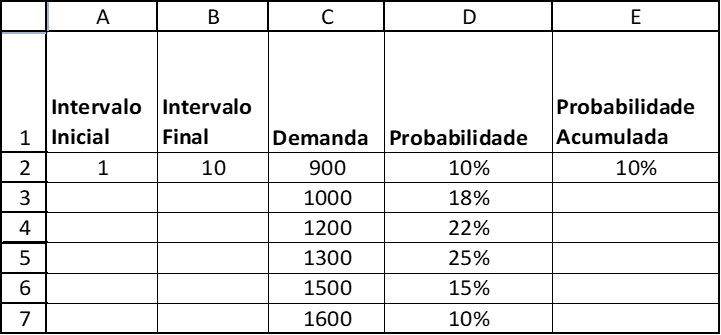

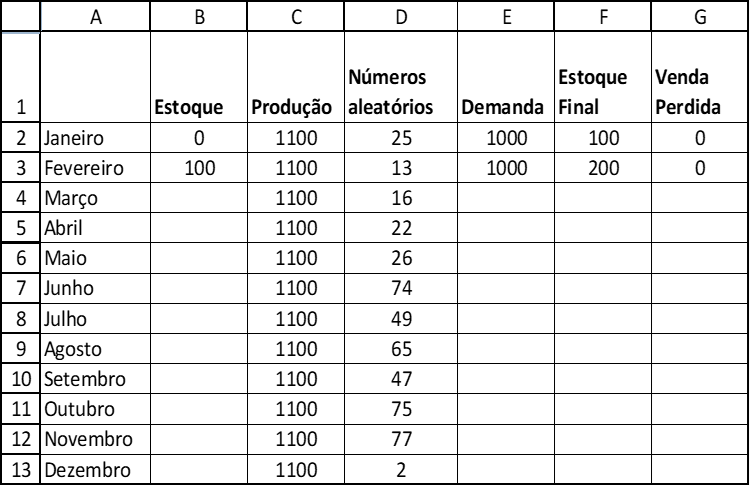

Considere, para os cálculos, que a margem de contribuição unitária de cada bolo é 20,00 reais, e que o custo de estocagem unitário para cada bolo, na câmara fria da indústria, gira em torno de 3,00 reais.

In [19]:
import pandas as pd
import numpy as np

demanda_mensal = {
    'demanda': [900, 1000, 1200, 1300, 1500, 1600],
    'Probabilidade':[0.1, 0.18, 0.22, 0.25, 0.15, 0.10]
}


dist_freq = pd.DataFrame(demanda_mensal)
print(dist_freq)

   demanda  Probabilidade
0      900           0.10
1     1000           0.18
2     1200           0.22
3     1300           0.25
4     1500           0.15
5     1600           0.10


In [20]:
Probabilidade_acumulada = []
acum = 0
for x in dist_freq['Probabilidade']:
    resultado = x + acum
    Probabilidade_acumulada.append(resultado)
    acum = resultado

#print('Esta é a lista com as probabilidades acumuladas: ',probabilidade_acumulada)

# Adicione uma nova coluna chamada 'Probabilidade'

dist_freq['Probabilidade_acumulada'] = Probabilidade_acumulada
dist_freq

demanda  Probabilidade  Probabilidade_acumulada
0      900           0.10                     0.10
1     1000           0.18                     0.28
2     1200           0.22                     0.50
3     1300           0.25                     0.75
4     1500           0.15                     0.90
5     1600           0.10                     1.00

In [21]:
lim_superior_demanda = []

for x in dist_freq['Probabilidade_acumulada']:
    lim_sup = x * 100
    lim_superior_demanda.append(lim_sup)

lim_sup
lim_superior_demanda

dist_freq['lim_superior_demanda'] = lim_superior_demanda
dist_freq

demanda  Probabilidade  Probabilidade_acumulada  lim_superior_demanda
0      900           0.10                     0.10                  10.0
1     1000           0.18                     0.28                  28.0
2     1200           0.22                     0.50                  50.0
3     1300           0.25                     0.75                  75.0
4     1500           0.15                     0.90                  90.0
5     1600           0.10                     1.00                 100.0

In [22]:
lim_inferior_demanda = [1]

for x in dist_freq['lim_superior_demanda']:
    lim_inf = x + 1
    lim_inferior_demanda.append(lim_inf)
    
lim_inferior_demanda
lim_inferior_demanda.pop(-1)
print(lim_inferior_demanda)

dist_freq['lim_inferior_demanda'] = lim_inferior_demanda
#dados_demanda['lim_superior_demanda'] = lim_superior_demanda
#dist_freq = pd.DataFrame( dados_chegada, index = ['linha 0', 'linha 1', 'linha 2', 'linha 3', 'linha 4'])
dist_freq

[1, 11.0, 29.000000000000004, 51.0, 76.0, 91.0]


demanda  Probabilidade  Probabilidade_acumulada  lim_superior_demanda  \
0      900           0.10                     0.10                  10.0   
1     1000           0.18                     0.28                  28.0   
2     1200           0.22                     0.50                  50.0   
3     1300           0.25                     0.75                  75.0   
4     1500           0.15                     0.90                  90.0   
5     1600           0.10                     1.00                 100.0   

   lim_inferior_demanda  
0                   1.0  
1                  11.0  
2                  29.0  
3                  51.0  
4                  76.0  
5                  91.0

In [23]:
matriz_busca = dist_freq.loc[:,['demanda','lim_inferior_demanda','lim_superior_demanda']]
print(matriz_busca)

   demanda  lim_inferior_demanda  lim_superior_demanda
0      900                   1.0                  10.0
1     1000                  11.0                  28.0
2     1200                  29.0                  50.0
3     1300                  51.0                  75.0
4     1500                  76.0                  90.0
5     1600                  91.0                 100.0


In [24]:
contagem = matriz_busca['demanda'].count() #contagem das linhas na matriz

In [41]:
from numpy import random

def criaLista(lim_inferior_demanda, lim_superior_demanda):
    return np.arange(lim_inferior_demanda, lim_superior_demanda+1,1)

tentativas = int(input("Digite quantas tentativas quer fazer começando do ZERO: "))

lista_demanda2 = [1000,1000,1000,1000,1000, 1300,1200,1300,1200,1300,1500,900]
lista_demanda = []
lista_randomica = []
lista_randomica2 = [25, 13, 16, 22, 26, 74, 49, 65, 47, 75, 77, 2]
Producao = [1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100]
EstoqueInicial = []
EstoqueFinal = []
VendaPerdida = []

j = 0
while (j <= tentativas):
    alea = lista_randomica2[j]
    #print('Alea = ', alea)
    #alea = random.randint(100)
    for i in range(0,contagem):
        x=int(matriz_busca.iloc[i]['lim_inferior_demanda'])
        y=int(matriz_busca.iloc[i]['lim_superior_demanda'])

        z=int(matriz_busca.iloc[i]['demanda'])
        lista = criaLista(x,y)
        #print('Demanda = ', z, 'Olá')    
    j += 1
matriz_demanda = pd.DataFrame(lista_demanda2, index=['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'], columns=['Demanda'])
matriz_demanda['Alea'] = lista_randomica2
matriz_demanda['Produção'] = Producao
k = 0
while (k <= tentativas):
    if k == 0:
        matriz_demanda['Est.Inicial'] = 0
        matriz_demanda['z'] = matriz_demanda.iloc[:,0]
        matriz_demanda['Est.Final'] = matriz_demanda['Est.Inicial']+(matriz_demanda['Produção']-matriz_demanda['z'])
        
        matriz_demanda['Vendas Perdidas'] = -matriz_demanda['Est.Final']
    else:
        if matriz_demanda['Est.Final'][k-1] < 0:
            matriz_demanda['Est.Inicial'][k] = 0
            matriz_demanda['Vendas Perdidas'][k-1] = -matriz_demanda['Est.Final'][k-1]
        else:
            matriz_demanda['Est.Inicial'][k] = matriz_demanda['Est.Final'][k-1]
            matriz_demanda['Vendas Perdidas'][k-1] = 0
            
        matriz_demanda['z'] = matriz_demanda.iloc[:,0]
        matriz_demanda['Est.Final'] = matriz_demanda['Est.Inicial']+(matriz_demanda['Produção']-matriz_demanda['z'])
        
        #matriz_demanda['Vendas Perdidas'][k] = -matriz_demanda['Est.Final'][k]
    k += 1
    
print(matriz_demanda)

total_demanda = matriz_demanda['Demanda'].sum()
print('total da demanda', total_demanda)
quantidade_demanda = (matriz_demanda['Demanda'].count())
print('quantidade da demanda', quantidade_demanda)
media_demanda = total_demanda / quantidade_demanda
print('\nA média da demanda é: {:.2f}'.format(media_demanda))
total_estoque = matriz_demanda['Est.Inicial'].sum()
print('total do estoque', total_estoque)
custo_estocagem = (total_estoque)*3
print('O custo de estocagem anual foi: R$ {:.2f}'.format(custo_estocagem))
vendas_perdidas_anual = matriz_demanda['Vendas Perdidas'].sum()
print('As Vendas Perdidas Anual foram: {:,} unidades'.format(vendas_perdidas_anual))
    

Digite quantas tentativas quer fazer começando do ZERO: 11
           Demanda  Alea  Produção  Est.Inicial     z  Est.Final  \
Janeiro       1000    25      1100            0  1000        100   
Fevereiro     1000    13      1100          100  1000        200   
Março         1000    16      1100          200  1000        300   
Abril         1000    22      1100          300  1000        400   
Maio          1000    26      1100          400  1000        500   
Junho         1300    74      1100          500  1300        300   
Julho         1200    49      1100          300  1200        200   
Agosto        1300    65      1100          200  1300          0   
Setembro      1200    47      1100            0  1200       -100   
Outubro       1300    75      1100            0  1300       -200   
Novembro      1500    77      1100            0  1500       -400   
Dezembro       900     2      1100            0   900        200   

           Vendas Perdidas  
Janeiro                  0 

### Usando o método o choice() do random NumPy: np.random.choice()

In [123]:
import pandas as pd
import numpy as np

demanda_mensal = {
    'demanda': [900, 1000, 1200, 1300, 1500, 1600],
    'Probabilidade':[0.1, 0.18, 0.22, 0.25, 0.15, 0.10]
}


dist_freq = pd.DataFrame(demanda_mensal)
print(dist_freq)

   demanda  Probabilidade
0      900           0.10
1     1000           0.18
2     1200           0.22
3     1300           0.25
4     1500           0.15
5     1600           0.10


In [124]:
contagem = dist_freq['demanda'].count() #contagem das linhas na matriz
print(contagem)

6


In [126]:
tentativas = 12
Probabilidade = dist_freq['Probabilidade']
demanda = np.random.choice(dist_freq['demanda'], tentativas, p = dist_freq['Probabilidade'])
print(demanda)

[1200 1600 1300 1500 1500 1000 1300 1200  900 1200 1300 1200]


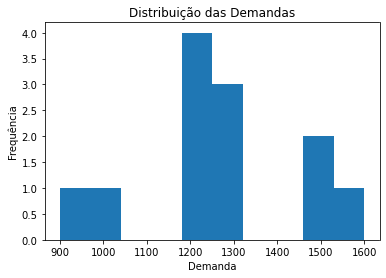

In [127]:
import matplotlib.pyplot as plt

x = demanda

plt.hist(x)
plt.xlabel('Demanda')
plt.ylabel('Frequência')
plt.title('Distribuição das Demandas')
plt.show()

In [122]:
from numpy import random

def criaLista(lim_inferior_demanda, lim_superior_demanda):
    return np.arange(lim_inferior_demanda, lim_superior_demanda+1,1)

tentativas = 12

lista_demanda = []

Producao = [1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100]

Probabilidade = dist_freq['Probabilidade']
lista_demanda = np.random.choice(dist_freq['demanda'], tentativas, p = dist_freq['Probabilidade'])

matriz_demanda = pd.DataFrame(lista_demanda, index=['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'], columns=['Demanda'])
    
matriz_demanda['Produção'] = Producao
k = 0
while (k <= 11):
    if k == 0:
        matriz_demanda['Est.Inicial'] = 0
        matriz_demanda['Est.Final'] = matriz_demanda['Est.Inicial']+(matriz_demanda['Produção']-matriz_demanda['Demanda'])
        
        matriz_demanda['Vendas Perdidas'] = -matriz_demanda['Est.Final']
    else:
        if matriz_demanda['Est.Final'][k-1] < 0:
            matriz_demanda['Est.Inicial'][k] = 0
            matriz_demanda['Vendas Perdidas'][k-1] = -matriz_demanda['Est.Final'][k-1]
        else:
            matriz_demanda['Est.Inicial'][k] = matriz_demanda['Est.Final'][k-1]
            matriz_demanda['Vendas Perdidas'][k-1] = 0
            
        matriz_demanda['Est.Final'] = matriz_demanda['Est.Inicial']+(matriz_demanda['Produção']-matriz_demanda['Demanda'])
        
    k += 1
    
print(matriz_demanda)

total_demanda = matriz_demanda['Demanda'].sum()
print('total da demanda', total_demanda)
quantidade_demanda = (matriz_demanda['Demanda'].count())
print('quantidade de demandas', quantidade_demanda)
media_demanda = total_demanda / quantidade_demanda
print('\nA média da demanda é: {:.2f}'.format(media_demanda))
total_estoque = matriz_demanda['Est.Inicial'].sum()
print('total do estoque', total_estoque)
custo_estocagem = (total_estoque)*3
print('O custo de estocagem anual foi: R$ {:.2f}'.format(custo_estocagem))
vendas_perdidas_anual = matriz_demanda['Vendas Perdidas'].sum()
print('As Vendas Perdidas Anual foram: {:,} unidades'.format(vendas_perdidas_anual))
    
    

           Demanda  Produção  Est.Inicial  Est.Final  Vendas Perdidas
Janeiro       1200      1100            0       -100              100
Fevereiro      900      1100            0        200                0
Março         1200      1100          200        100                0
Abril         1000      1100          100        200                0
Maio          1600      1100          200       -300              300
Junho         1200      1100            0       -100              100
Julho         1300      1100            0       -200              200
Agosto         900      1100            0        200                0
Setembro      1300      1100          200          0                0
Outubro       1000      1100            0        100                0
Novembro      1000      1100          100        200                0
Dezembro      1300      1100          200          0              200
total da demanda 13900
quantidade de demandas 12

A média da demanda é: 1158.33
total do e